## Named Entity Eecognition with pretrained pipeline en_core_web_sm

In [2]:
import pandas as pd
import joblib as jbl
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
import seaborn as sns
import spacy
from spacy import displacy
from spacy.cli import download
download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Loading clean texts and concatenating

In [3]:
df = jbl.load("preprocessed_df.pkl")
texts = [" ".join(tokenized) for tokenized in df['clean_text'].values]

### Running the pipeline

In [4]:
docs = []
for doc in nlp.pipe(texts, batch_size=64, n_process=multiprocessing.cpu_count()): #could be faster with GPU acceleration
    docs.append(doc)

### Multiple samples

In [5]:
good_samples = []
n_samples = 10
i = 0
while len(good_samples) != n_samples:
    if len(docs[i].ents) > 2:
        good_samples.append(docs[i])
    i+=1
displacy.render(good_samples, style="ent")

### TOP 10 Entity types

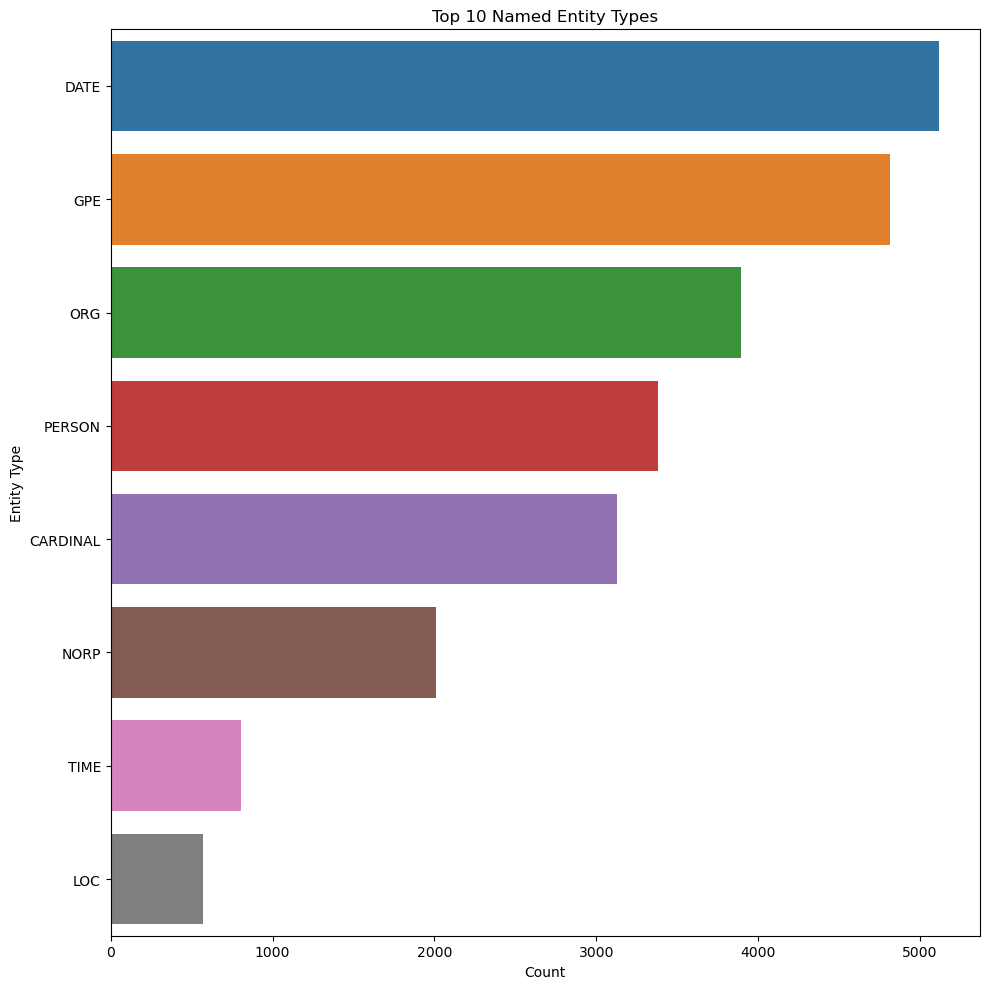

In [7]:
freqs = {}
for doc in docs:
    for ent in doc.ents:
        if  ent.label_ in freqs.keys():
            freqs[ent.label_] += 1 
        else:
            freqs[ent.label_] = 1
    
freqs = pd.DataFrame({"type": freqs.keys(), "count": freqs.values()}).sort_values("count", ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(data=freqs.loc[:9,], x='count', y='type', hue = "type")
plt.title('Top 10 Named Entity Types')
plt.xlabel('Count')
plt.ylabel('Entity Type')
plt.tight_layout()
plt.show()

Dominant entity types (GPE, DATE, ORG) suggest messages frequently mention places and timing, useful for mapping hotspots and scheduling response. Also, high counts of GPE/LOC indicate strong routing signals (cities/regions) that can be geocoded. ORG mentions surface involved agencies/utilities. PERSON seem to give quite high amount of false positives and noisier, which is seen from the couple of printed samples. Given that we have used an aggressive cleaning, some entities may be missed. But general outlook seem to be quite normal considering that we are working with disaster messages